In [1]:
##############################################################################################################
# DESCRIPTION: 
# RESULTS:     
#              
##############################################################################################################

In [2]:
######################
# CONFIG & HYPERPARAMS
######################

import os

class HyperParams:
    pass

IMG_PATH = "C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/"

IMG_PATH_VALID = IMG_PATH + "validation/"
IMG_PATH_TEST = IMG_PATH + "test/"
IMG_PATH_TRAIN = IMG_PATH

hyperparams = HyperParams()
hyperparams.IMG_WIDTH = 64
hyperparams.IMG_HEIGHT = 64
hyperparams.EPOCHS = 500
hyperparams.BATCH_SIZE = 32

hyperparams.LOSS = 'mean_absolute_error'

IMG_WIDTH = hyperparams.IMG_WIDTH
IMG_HEIGHT = hyperparams.IMG_HEIGHT

IMG_CASE = str(IMG_WIDTH) +  "/0001_0010"
MODEL_NAME = "0001_0010-64-convsim-xxc3"

DEST_TESTS = os.path.abspath(os.path.join('../../../out_tests/', MODEL_NAME))

class RadianceLimits:
    pass
radiance_limits = RadianceLimits()
radiance_limits.noisy_min = 0
radiance_limits.noisy_max = 0.1418
radiance_limits.nitid_min = 0
radiance_limits.nitid_max = 0.2947

from tensorflow.keras.optimizers import RMSprop
hyperparams.OPTIMIZER = RMSprop(learning_rate=0.0005)

In [3]:
##################
# IMPORTS
##################

import tensorflow as tf
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.compat.v1.Session(config=config)

import numpy as np
import tensorflow 
from numpy.random import seed
seed(1)
tensorflow.random.set_seed(2)
import os, sys
module_path = os.path.abspath(os.path.join('../../support/'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import DatasetUtilsTifF as dsutils
import TrainModelD as train
import ReportsK as reports
import ConvSimG as model_factory

In [4]:
##################
# MODEL DEFINITION
##################
model = model_factory.buildModel(hyperparams)
model.summary()
model.optimizer.get_config()
model.optimizer.get_config()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 64, 64, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 32, 32, 32)   544         input_1[0][0]                    
__________________________________________________________________________________________________
activation_4 (Activation)       (None, 32, 32, 32)   0           conv2d_2[0][0]                   
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 16, 16, 16)   8208        activation_4[0][0]               
______________________________________________________________________________________________

{'name': 'RMSprop',
 'learning_rate': 0.0005,
 'decay': 0.0,
 'rho': 0.9,
 'momentum': 0.0,
 'epsilon': 1e-07,
 'centered': False}

In [5]:
##################
# PREPARE DATA
##################

train_noisy_files, train_nitid_files, train_noisy, train_nitid = \
        dsutils.readDataset( IMG_PATH_TRAIN, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT, radiance_limits)

val_noisy_files, val_nitid_files, val_noisy, val_nitid = \
        dsutils.readDataset( IMG_PATH_VALID, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT, radiance_limits)

train_noisy, train_nitid = dsutils.reshapeDataset( train_noisy, train_nitid, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT )
val_noisy, val_nitid = dsutils.reshapeDataset( val_noisy, val_nitid, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT )

Read dataset. Path: C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/
Noisy files:19657
Nitid files:19657
Read dataset. Path: C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/validation/
Noisy files:4900
Nitid files:4900


In [6]:
##################
# TRAIN MODEL
##################
import tensorflow as tf
from tensorflow.compat.v1.keras.backend import set_session
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True  # dynamically grow the memory used on the GPU
config.log_device_placement = True  # to log device placement (on which device the operation ran)
sess = tf.compat.v1.Session(config=config)
set_session(sess)

checkpoint_filepath = os.path.abspath(os.path.join('../../../saves/') + MODEL_NAME \
                                      + "_checkpoint_" + '_weights_{epoch:02d}-{val_loss:.2f}')

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

hist = train.fit( model, hyperparams, train_noisy, train_nitid, val_noisy, val_nitid, patience = 50, \
                 callbacks=[model_checkpoint_callback] )

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: NVIDIA GeForce RTX 3070 Ti, pci bus id: 0000:2b:00.0, compute capability: 8.6

Epoch 1/500
615/615 [==============================] - 10s 10ms/step - loss: 0.0498 - val_loss: 0.0537
INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0001_0010-64-convsim-xxc3_checkpoint__weights_01-0.05\assets
Epoch 2/500
  8/615 [..............................] - ETA: 10s - loss: 0.0440

C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


615/615 [==============================] - 6s 10ms/step - loss: 0.0441 - val_loss: 0.0465
INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0001_0010-64-convsim-xxc3_checkpoint__weights_02-0.05\assets
Epoch 3/500
  9/615 [..............................] - ETA: 9s - loss: 0.0436

C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


615/615 [==============================] - 6s 10ms/step - loss: 0.0428 - val_loss: 0.0462
INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0001_0010-64-convsim-xxc3_checkpoint__weights_03-0.05\assets
Epoch 4/500
  9/615 [..............................] - ETA: 9s - loss: 0.0365

C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


615/615 [==============================] - 6s 10ms/step - loss: 0.0415 - val_loss: 0.0452
INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0001_0010-64-convsim-xxc3_checkpoint__weights_04-0.05\assets
Epoch 5/500
  7/615 [..............................] - ETA: 10s - loss: 0.0395

C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


615/615 [==============================] - 6s 10ms/step - loss: 0.0403 - val_loss: 0.0463
Epoch 6/500
615/615 [==============================] - 5s 9ms/step - loss: 0.0390 - val_loss: 0.0387
INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0001_0010-64-convsim-xxc3_checkpoint__weights_06-0.04\assets
Epoch 7/500
  7/615 [..............................] - ETA: 10s - loss: 0.0360

C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


615/615 [==============================] - 6s 9ms/step - loss: 0.0377 - val_loss: 0.0384
INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0001_0010-64-convsim-xxc3_checkpoint__weights_07-0.04\assets
Epoch 8/500
  9/615 [..............................] - ETA: 9s - loss: 0.0353

C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


615/615 [==============================] - 6s 10ms/step - loss: 0.0365 - val_loss: 0.0355
INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0001_0010-64-convsim-xxc3_checkpoint__weights_08-0.04\assets
Epoch 9/500
  7/615 [..............................] - ETA: 11s - loss: 0.0357

C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


615/615 [==============================] - 6s 9ms/step - loss: 0.0359 - val_loss: 0.0364
Epoch 10/500
615/615 [==============================] - 5s 9ms/step - loss: 0.0352 - val_loss: 0.0412
Epoch 11/500
615/615 [==============================] - 6s 9ms/step - loss: 0.0347 - val_loss: 0.0354
INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0001_0010-64-convsim-xxc3_checkpoint__weights_11-0.04\assets
Epoch 12/500
  9/615 [..............................] - ETA: 9s - loss: 0.0348

C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


615/615 [==============================] - 6s 10ms/step - loss: 0.0340 - val_loss: 0.0368
Epoch 13/500
615/615 [==============================] - 6s 9ms/step - loss: 0.0337 - val_loss: 0.0354
Epoch 14/500
615/615 [==============================] - 6s 9ms/step - loss: 0.0333 - val_loss: 0.0354
Epoch 15/500
615/615 [==============================] - 6s 9ms/step - loss: 0.0330 - val_loss: 0.0417
Epoch 16/500
615/615 [==============================] - 5s 9ms/step - loss: 0.0326 - val_loss: 0.0347
INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0001_0010-64-convsim-xxc3_checkpoint__weights_16-0.03\assets
Epoch 17/500
  9/615 [..............................] - ETA: 8s - loss: 0.0321

C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


615/615 [==============================] - 6s 10ms/step - loss: 0.0323 - val_loss: 0.0327
INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0001_0010-64-convsim-xxc3_checkpoint__weights_17-0.03\assets
Epoch 18/500
 10/615 [..............................] - ETA: 10s - loss: 0.0308

C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


615/615 [==============================] - 6s 10ms/step - loss: 0.0321 - val_loss: 0.0370
Epoch 19/500
615/615 [==============================] - 6s 9ms/step - loss: 0.0319 - val_loss: 0.0455
Epoch 20/500
615/615 [==============================] - 5s 9ms/step - loss: 0.0317 - val_loss: 0.0338
Epoch 21/500
615/615 [==============================] - 6s 9ms/step - loss: 0.0315 - val_loss: 0.0355
Epoch 22/500
615/615 [==============================] - 6s 9ms/step - loss: 0.0314 - val_loss: 0.0376
Epoch 23/500
615/615 [==============================] - 6s 9ms/step - loss: 0.0313 - val_loss: 0.0349
Epoch 24/500
615/615 [==============================] - 6s 9ms/step - loss: 0.0311 - val_loss: 0.0387
Epoch 25/500
615/615 [==============================] - 6s 9ms/step - loss: 0.0309 - val_loss: 0.0403
Epoch 26/500
615/615 [==============================] - 6s 9ms/step - loss: 0.0309 - val_loss: 0.0434
Epoch 27/500
615/615 [==============================] - 6s 9ms/step - loss: 0.0308 - val_loss:

C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


615/615 [==============================] - 6s 10ms/step - loss: 0.0306 - val_loss: 0.0364
Epoch 29/500
615/615 [==============================] - 5s 9ms/step - loss: 0.0306 - val_loss: 0.0347
Epoch 30/500
615/615 [==============================] - 5s 9ms/step - loss: 0.0304 - val_loss: 0.0318
Epoch 31/500
615/615 [==============================] - 6s 9ms/step - loss: 0.0304 - val_loss: 0.0311
INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0001_0010-64-convsim-xxc3_checkpoint__weights_31-0.03\assets
Epoch 32/500
  9/615 [..............................] - ETA: 9s - loss: 0.0292

C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


615/615 [==============================] - 6s 10ms/step - loss: 0.0302 - val_loss: 0.0315
Epoch 33/500
615/615 [==============================] - 6s 9ms/step - loss: 0.0301 - val_loss: 0.0358
Epoch 34/500
615/615 [==============================] - 6s 9ms/step - loss: 0.0300 - val_loss: 0.0325
Epoch 35/500
615/615 [==============================] - 6s 9ms/step - loss: 0.0299 - val_loss: 0.0347
Epoch 36/500
615/615 [==============================] - 6s 9ms/step - loss: 0.0300 - val_loss: 0.0491
Epoch 37/500
615/615 [==============================] - 5s 9ms/step - loss: 0.0297 - val_loss: 0.0344
Epoch 38/500
615/615 [==============================] - 6s 9ms/step - loss: 0.0298 - val_loss: 0.0323
Epoch 39/500
615/615 [==============================] - 6s 9ms/step - loss: 0.0297 - val_loss: 0.0326
Epoch 40/500
615/615 [==============================] - 6s 9ms/step - loss: 0.0297 - val_loss: 0.0319
Epoch 41/500
615/615 [==============================] - 6s 10ms/step - loss: 0.0296 - val_loss

C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


615/615 [==============================] - 6s 9ms/step - loss: 0.0290 - val_loss: 0.0305
INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0001_0010-64-convsim-xxc3_checkpoint__weights_51-0.03\assets
Epoch 52/500
  9/615 [..............................] - ETA: 9s - loss: 0.0277

C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


615/615 [==============================] - 6s 10ms/step - loss: 0.0290 - val_loss: 0.0313
Epoch 53/500
615/615 [==============================] - 5s 9ms/step - loss: 0.0289 - val_loss: 0.0319
Epoch 54/500
615/615 [==============================] - 6s 9ms/step - loss: 0.0289 - val_loss: 0.0323
Epoch 55/500
615/615 [==============================] - 6s 9ms/step - loss: 0.0288 - val_loss: 0.0340
Epoch 56/500
615/615 [==============================] - 6s 9ms/step - loss: 0.0288 - val_loss: 0.0295
INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0001_0010-64-convsim-xxc3_checkpoint__weights_56-0.03\assets
Epoch 57/500
  9/615 [..............................] - ETA: 9s - loss: 0.0295

C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


615/615 [==============================] - 6s 10ms/step - loss: 0.0288 - val_loss: 0.0312
Epoch 58/500
615/615 [==============================] - 6s 9ms/step - loss: 0.0287 - val_loss: 0.0302
Epoch 59/500
615/615 [==============================] - 6s 9ms/step - loss: 0.0287 - val_loss: 0.0341
Epoch 60/500
615/615 [==============================] - 6s 9ms/step - loss: 0.0287 - val_loss: 0.0306
Epoch 61/500
615/615 [==============================] - 6s 9ms/step - loss: 0.0286 - val_loss: 0.0299
Epoch 62/500
615/615 [==============================] - 6s 9ms/step - loss: 0.0286 - val_loss: 0.0360
Epoch 63/500
615/615 [==============================] - 5s 9ms/step - loss: 0.0285 - val_loss: 0.0324
Epoch 64/500
615/615 [==============================] - 6s 9ms/step - loss: 0.0286 - val_loss: 0.0328
Epoch 65/500
615/615 [==============================] - 6s 9ms/step - loss: 0.0285 - val_loss: 0.0339
Epoch 66/500
615/615 [==============================] - 6s 9ms/step - loss: 0.0284 - val_loss:

C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


615/615 [==============================] - 6s 10ms/step - loss: 0.0281 - val_loss: 0.0337
Epoch 78/500
615/615 [==============================] - 6s 9ms/step - loss: 0.0280 - val_loss: 0.0297
Epoch 79/500
615/615 [==============================] - 6s 9ms/step - loss: 0.0280 - val_loss: 0.0334
Epoch 80/500
615/615 [==============================] - 6s 9ms/step - loss: 0.0279 - val_loss: 0.0325
Epoch 81/500
615/615 [==============================] - 6s 9ms/step - loss: 0.0279 - val_loss: 0.0365
Epoch 82/500
615/615 [==============================] - 6s 9ms/step - loss: 0.0279 - val_loss: 0.0311
Epoch 83/500
615/615 [==============================] - 6s 9ms/step - loss: 0.0278 - val_loss: 0.0304
Epoch 84/500
615/615 [==============================] - 6s 9ms/step - loss: 0.0278 - val_loss: 0.0331
Epoch 85/500
615/615 [==============================] - 6s 9ms/step - loss: 0.0278 - val_loss: 0.0299
Epoch 86/500
615/615 [==============================] - 6s 9ms/step - loss: 0.0278 - val_loss:

C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


615/615 [==============================] - 6s 10ms/step - loss: 0.0277 - val_loss: 0.0340
Epoch 88/500
615/615 [==============================] - 6s 9ms/step - loss: 0.0277 - val_loss: 0.0330
Epoch 89/500
615/615 [==============================] - 6s 9ms/step - loss: 0.0276 - val_loss: 0.0306
Epoch 90/500
615/615 [==============================] - 6s 9ms/step - loss: 0.0276 - val_loss: 0.0302
Epoch 91/500
615/615 [==============================] - 5s 9ms/step - loss: 0.0277 - val_loss: 0.0291
INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0001_0010-64-convsim-xxc3_checkpoint__weights_91-0.03\assets
Epoch 92/500
  9/615 [..............................] - ETA: 9s - loss: 0.0278

C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


615/615 [==============================] - 6s 10ms/step - loss: 0.0275 - val_loss: 0.0329
Epoch 93/500
615/615 [==============================] - 6s 9ms/step - loss: 0.0276 - val_loss: 0.0315
Epoch 94/500
615/615 [==============================] - 6s 9ms/step - loss: 0.0275 - val_loss: 0.0318
Epoch 95/500
615/615 [==============================] - 6s 9ms/step - loss: 0.0274 - val_loss: 0.0315
Epoch 96/500
615/615 [==============================] - 6s 9ms/step - loss: 0.0275 - val_loss: 0.0298
Epoch 97/500
615/615 [==============================] - 6s 9ms/step - loss: 0.0274 - val_loss: 0.0299
Epoch 98/500
615/615 [==============================] - 6s 9ms/step - loss: 0.0274 - val_loss: 0.0290
INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0001_0010-64-convsim-xxc3_checkpoint__weights_98-0.03\assets
Epoch 99/500
  9/615 [..............................] - ETA: 9s - loss: 0.0286

C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


615/615 [==============================] - 6s 10ms/step - loss: 0.0273 - val_loss: 0.0369
Epoch 100/500
615/615 [==============================] - 6s 9ms/step - loss: 0.0274 - val_loss: 0.0320
Epoch 101/500
615/615 [==============================] - 6s 9ms/step - loss: 0.0273 - val_loss: 0.0322
Epoch 102/500
615/615 [==============================] - 6s 9ms/step - loss: 0.0273 - val_loss: 0.0308
Epoch 103/500
615/615 [==============================] - 6s 9ms/step - loss: 0.0273 - val_loss: 0.0318
Epoch 104/500
615/615 [==============================] - 6s 9ms/step - loss: 0.0273 - val_loss: 0.0308
Epoch 105/500
615/615 [==============================] - 5s 9ms/step - loss: 0.0272 - val_loss: 0.0297
Epoch 106/500
615/615 [==============================] - 6s 9ms/step - loss: 0.0273 - val_loss: 0.0325
Epoch 107/500
615/615 [==============================] - 6s 9ms/step - loss: 0.0272 - val_loss: 0.0298
Epoch 108/500
615/615 [==============================] - 6s 9ms/step - loss: 0.0272 - 

C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


615/615 [==============================] - 6s 10ms/step - loss: 0.0270 - val_loss: 0.0315
Epoch 119/500
615/615 [==============================] - 5s 9ms/step - loss: 0.0270 - val_loss: 0.0307
Epoch 120/500
615/615 [==============================] - 6s 9ms/step - loss: 0.0270 - val_loss: 0.0301
Epoch 121/500
615/615 [==============================] - 5s 9ms/step - loss: 0.0270 - val_loss: 0.0298
Epoch 122/500
615/615 [==============================] - 6s 9ms/step - loss: 0.0270 - val_loss: 0.0301
Epoch 123/500
615/615 [==============================] - 6s 9ms/step - loss: 0.0269 - val_loss: 0.0324
Epoch 124/500
615/615 [==============================] - 6s 9ms/step - loss: 0.0270 - val_loss: 0.0306
Epoch 125/500
615/615 [==============================] - 6s 9ms/step - loss: 0.0269 - val_loss: 0.0322
Epoch 126/500
615/615 [==============================] - 6s 9ms/step - loss: 0.0269 - val_loss: 0.0289
Epoch 127/500
615/615 [==============================] - 6s 9ms/step - loss: 0.0268 - 

C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


615/615 [==============================] - 6s 9ms/step - loss: 0.0265 - val_loss: 0.0308
Epoch 158/500
615/615 [==============================] - 5s 9ms/step - loss: 0.0264 - val_loss: 0.0301
Epoch 159/500
615/615 [==============================] - 6s 9ms/step - loss: 0.0264 - val_loss: 0.0296
Epoch 160/500
615/615 [==============================] - 6s 9ms/step - loss: 0.0264 - val_loss: 0.0309
Epoch 161/500
615/615 [==============================] - 6s 9ms/step - loss: 0.0264 - val_loss: 0.0300
Epoch 162/500
615/615 [==============================] - 6s 9ms/step - loss: 0.0264 - val_loss: 0.0292
Epoch 163/500
615/615 [==============================] - 6s 9ms/step - loss: 0.0264 - val_loss: 0.0295
Epoch 164/500
615/615 [==============================] - 6s 9ms/step - loss: 0.0264 - val_loss: 0.0289
Epoch 165/500
615/615 [==============================] - 5s 9ms/step - loss: 0.0263 - val_loss: 0.0288
Epoch 166/500
615/615 [==============================] - 6s 9ms/step - loss: 0.0264 - v

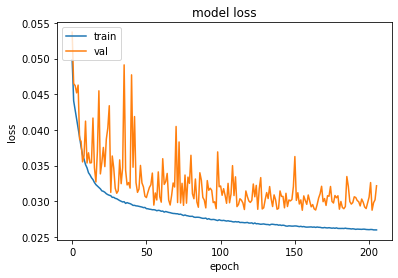

Best Epoch:156


In [7]:
##################
# REPORTS
##################
reports.plotHistory( hist )

In [8]:
model.save(os.path.abspath(os.path.join('../../../saves/', MODEL_NAME)), model)

INFO:tensorflow:Assets written to: C:\Projects\VenusDenoise\saves\0001_0010-64-convsim-xxc3\assets


C:\Users\rdelasheras\Anaconda3\envs\tf-gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [9]:
##################
# PREDICTIONS
##################
ACCURACY_THRESHOLD = 0.01
predictions_metrics, predictions_headers \
    = reports.calcPredictionMetrics( model, val_noisy, val_nitid, ACCURACY_THRESHOLD, \
                                    save_pred = True, save_path = DEST_TESTS, \
                                    noisy_files = val_noisy_files, nitid_files = val_nitid_files, \
                                    max_nitid= radiance_limits.nitid_max  )

Black image found
Black image found
Black image found
Black image found
Black image found
Images count =4900
Best RMSENZ  =4416 (0.90)
Best MAENZ   =4458 (0.91)
Best PSNR    =4416 (0.90)
Best Accuracy=4549 (0.93)
RMSE-NZ  Pred=0.0383  Noisy=0.1031
MAE-NZ   Pred=0.0292  Noisy=0.0937
PSNR     Pred=16.1 dB Noisy=8.8 dB
Accuracy Pred=0.33    Noisy=0.12
SSM      Pred=0.76    Noisy=0.41
HOG MSE  Pred=0.07    Noisy=0.08


In [10]:
reports.saveMetrics( DEST_TESTS, MODEL_NAME, predictions_headers, predictions_metrics )

Read dataset. Path: C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test/
Noisy files:17
Nitid files:17
Index:0
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0025_06_00_2_noisy_idx006.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0025_06_00_2_nitid_idx008.tif


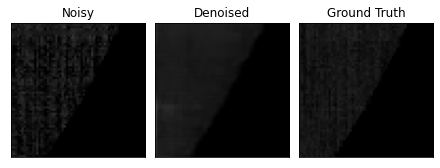

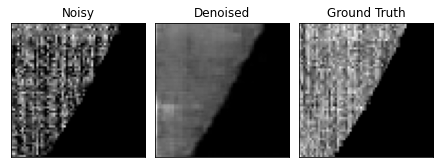

RMSE-NZ  Pred=0.0274  Noisy=0.0423 BEST
MAE-NZ   Pred=0.0163  Noisy=0.0298 BEST
PSNR     Pred=14.9 dB Noisy=11.1 dB BEST
Accuracy Pred=0.55    Noisy=0.36 BEST
SSM      Pred=0.79    Noisy=0.65
HOG MSE  Pred=0.07    Noisy=0.01
******************************************************
Index:1
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0025_06_01_5_noisy_idx020.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0025_06_01_5_nitid_idx017.tif


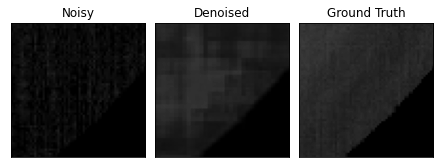

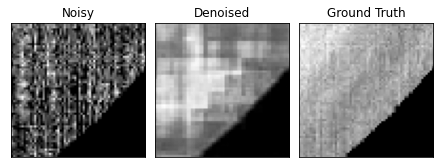

RMSE-NZ  Pred=0.0450  Noisy=0.1180 BEST
MAE-NZ   Pred=0.0344  Noisy=0.1096 BEST
PSNR     Pred=14.4 dB Noisy=6.1 dB BEST
Accuracy Pred=0.28    Noisy=0.07 BEST
SSM      Pred=0.73    Noisy=0.44
HOG MSE  Pred=0.04    Noisy=0.09
******************************************************
Index:2
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0330_02_04_9_noisy_idx157.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0330_02_04_9_nitid_idx146.tif


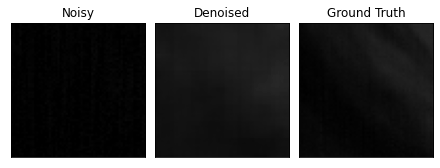

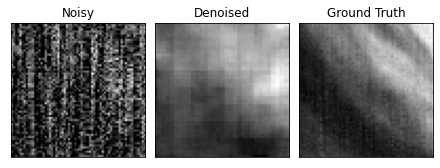

RMSE-NZ  Pred=0.0385  Noisy=0.0587 BEST
MAE-NZ   Pred=0.0342  Noisy=0.0477 BEST
PSNR     Pred=12.3 dB Noisy=8.6 dB BEST
Accuracy Pred=0.10    Noisy=0.13 WORST
SSM      Pred=0.75    Noisy=0.20
HOG MSE  Pred=0.05    Noisy=0.07
******************************************************
Index:3
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0330_03_03_11_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0330_03_03_11_nitid_idx134.tif


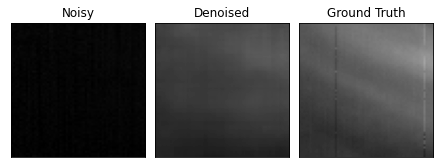

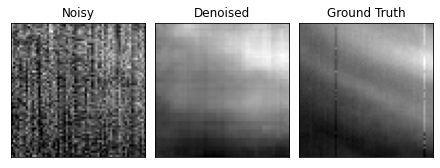

RMSE-NZ  Pred=0.1156  Noisy=0.3357 BEST
MAE-NZ   Pred=0.1054  Noisy=0.3214 BEST
PSNR     Pred=14.8 dB Noisy=5.6 dB BEST
Accuracy Pred=0.00    Noisy=0.00 BEST
SSM      Pred=0.80    Noisy=0.14
HOG MSE  Pred=0.09    Noisy=0.11
******************************************************
Index:4
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0330_03_03_13_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0330_03_03_13_nitid_idx134.tif


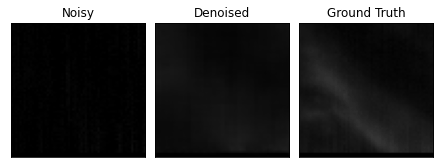

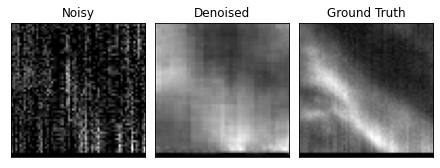

RMSE-NZ  Pred=0.0401  Noisy=0.0869 BEST
MAE-NZ   Pred=0.0295  Noisy=0.0747 BEST
PSNR     Pred=14.4 dB Noisy=7.7 dB BEST
Accuracy Pred=0.30    Noisy=0.01 BEST
SSM      Pred=0.83    Noisy=0.27
HOG MSE  Pred=0.04    Noisy=0.11
******************************************************
Index:5
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0330_03_03_3_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0330_03_03_3_nitid_idx134.tif


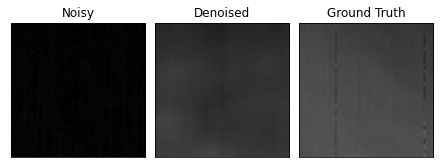

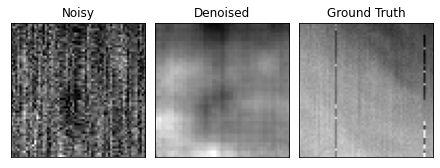

RMSE-NZ  Pred=0.0874  Noisy=0.2662 BEST
MAE-NZ   Pred=0.0845  Noisy=0.2643 BEST
PSNR     Pred=12.7 dB Noisy=3.1 dB BEST
Accuracy Pred=0.01    Noisy=0.00 BEST
SSM      Pred=0.83    Noisy=0.15
HOG MSE  Pred=0.08    Noisy=0.10
******************************************************
Index:6
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0330_03_03_5_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0330_03_03_5_nitid_idx134.tif


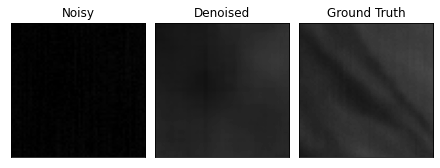

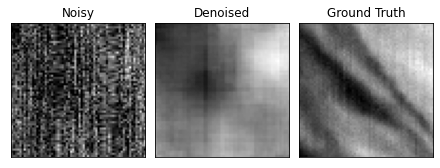

RMSE-NZ  Pred=0.0503  Noisy=0.1729 BEST
MAE-NZ   Pred=0.0446  Noisy=0.1686 BEST
PSNR     Pred=15.1 dB Noisy=4.4 dB BEST
Accuracy Pred=0.07    Noisy=0.00 BEST
SSM      Pred=0.83    Noisy=0.16
HOG MSE  Pred=0.09    Noisy=0.15
******************************************************
Index:7
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0338_04_00_10_noisy_idx006.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0338_04_00_10_nitid_idx008.tif


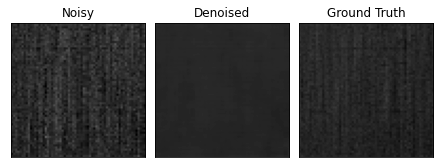

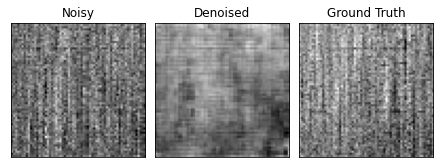

RMSE-NZ  Pred=0.0276  Noisy=0.0606 BEST
MAE-NZ   Pred=0.0219  Noisy=0.0478 BEST
PSNR     Pred=18.9 dB Noisy=12.0 dB BEST
Accuracy Pred=0.29    Noisy=0.15 BEST
SSM      Pred=0.60    Noisy=0.32
HOG MSE  Pred=0.03    Noisy=0.03
******************************************************
Index:8
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0339_04_03_5_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0339_04_03_5_nitid_idx134.tif


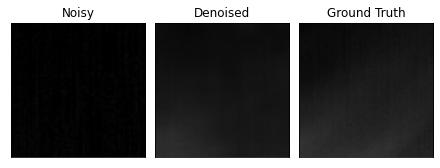

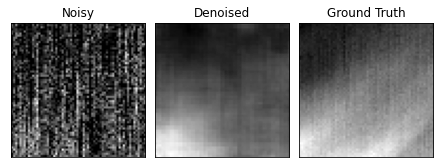

RMSE-NZ  Pred=0.0316  Noisy=0.1061 BEST
MAE-NZ   Pred=0.0258  Noisy=0.0983 BEST
PSNR     Pred=16.3 dB Noisy=5.8 dB BEST
Accuracy Pred=0.22    Noisy=0.00 BEST
SSM      Pred=0.90    Noisy=0.21
HOG MSE  Pred=0.05    Noisy=0.04
******************************************************
Index:9
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0339_05_03_8_noisy_idx123.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0339_05_03_8_nitid_idx134.tif


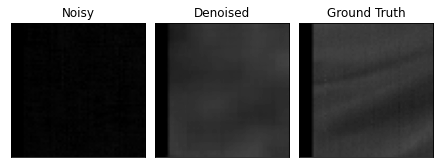

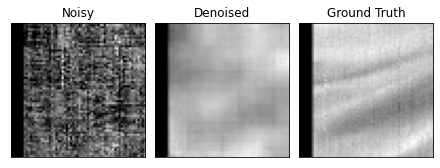

RMSE-NZ  Pred=0.0373  Noisy=0.1969 BEST
MAE-NZ   Pred=0.0274  Noisy=0.1941 BEST
PSNR     Pred=17.6 dB Noisy=3.2 dB BEST
Accuracy Pred=0.28    Noisy=0.00 BEST
SSM      Pred=0.89    Noisy=0.14
HOG MSE  Pred=0.03    Noisy=0.24
******************************************************
Index:10
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0353_09_00_15_noisy_idx006.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0353_09_00_15_nitid_idx008.tif


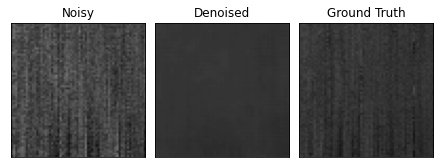

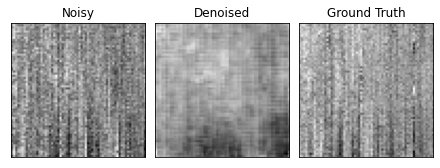

RMSE-NZ  Pred=0.0272  Noisy=0.0925 BEST
MAE-NZ   Pred=0.0211  Noisy=0.0774 BEST
PSNR     Pred=20.8 dB Noisy=10.1 dB BEST
Accuracy Pred=0.31    Noisy=0.06 BEST
SSM      Pred=0.61    Noisy=0.30
HOG MSE  Pred=0.06    Noisy=0.03
******************************************************
Index:11
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0357_01_00_5_noisy_idx006.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0357_01_00_5_nitid_idx008.tif


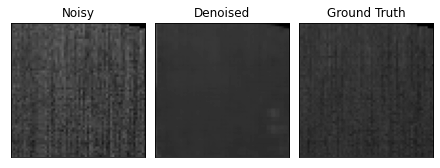

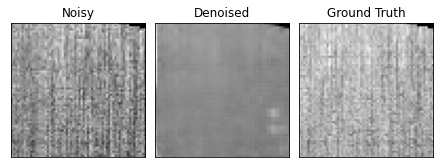

RMSE-NZ  Pred=0.0255  Noisy=0.0770 BEST
MAE-NZ   Pred=0.0192  Noisy=0.0644 BEST
PSNR     Pred=20.9 dB Noisy=11.2 dB BEST
Accuracy Pred=0.34    Noisy=0.08 BEST
SSM      Pred=0.66    Noisy=0.34
HOG MSE  Pred=0.06    Noisy=0.03
******************************************************
Index:12
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0357_01_01_7_noisy_idx020.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0357_01_01_7_nitid_idx017.tif


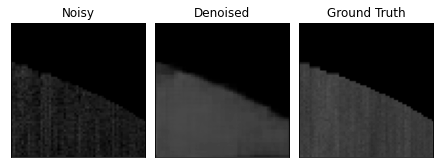

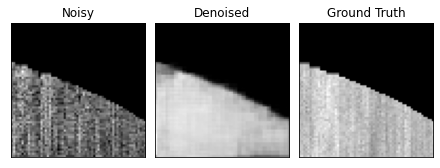

RMSE-NZ  Pred=0.0290  Noisy=0.1235 BEST
MAE-NZ   Pred=0.0171  Noisy=0.1063 BEST
PSNR     Pred=20.8 dB Noisy=8.2 dB BEST
Accuracy Pred=0.56    Noisy=0.19 BEST
SSM      Pred=0.83    Noisy=0.64
HOG MSE  Pred=0.10    Noisy=0.01
******************************************************
Index:13
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0618_03_01_9_noisy_idx020.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0618_03_01_9_nitid_idx017.tif


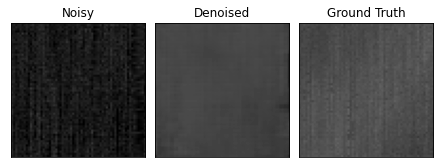

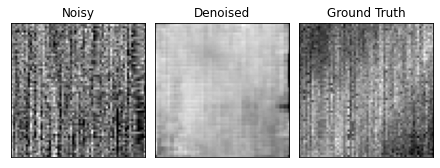

RMSE-NZ  Pred=0.0509  Noisy=0.2174 BEST
MAE-NZ   Pred=0.0433  Noisy=0.2121 BEST
PSNR     Pred=17.8 dB Noisy=5.2 dB BEST
Accuracy Pred=0.10    Noisy=0.00 BEST
SSM      Pred=0.66    Noisy=0.27
HOG MSE  Pred=0.07    Noisy=0.05
******************************************************
Index:14
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0720_00_04_11_noisy_idx157.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0720_00_04_11_nitid_idx146.tif


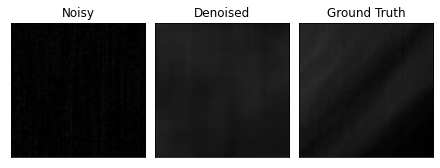

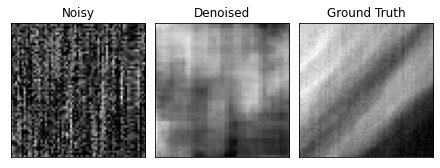

RMSE-NZ  Pred=0.0351  Noisy=0.0873 BEST
MAE-NZ   Pred=0.0281  Noisy=0.0780 BEST
PSNR     Pred=14.1 dB Noisy=6.2 dB BEST
Accuracy Pred=0.25    Noisy=0.06 BEST
SSM      Pred=0.78    Noisy=0.23
HOG MSE  Pred=0.12    Noisy=0.17
******************************************************
Index:15
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0720_01_00_2_noisy_idx006.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0720_01_00_2_nitid_idx008.tif


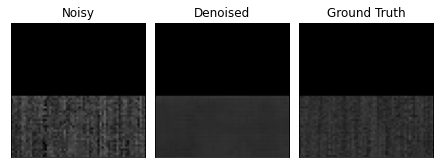

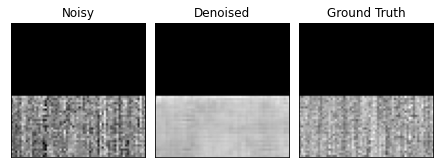

RMSE-NZ  Pred=0.0232  Noisy=0.0789 BEST
MAE-NZ   Pred=0.0131  Noisy=0.0631 BEST
PSNR     Pred=21.9 dB Noisy=11.2 dB BEST
Accuracy Pred=0.63    Noisy=0.09 BEST
SSM      Pred=0.78    Noisy=0.66
HOG MSE  Pred=0.25    Noisy=0.02
******************************************************
Index:16
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0726_03_01_15_noisy_idx020.tif
C:/Projects/VenusDenoise/dataset/cases/64/0001_0010/test\VI0726_03_01_15_nitid_idx017.tif


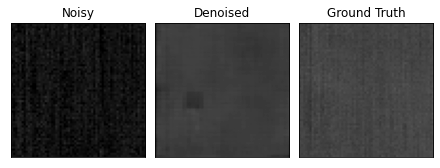

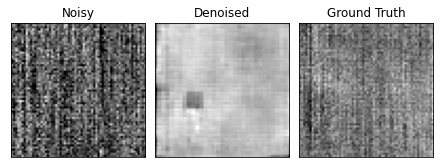

RMSE-NZ  Pred=0.0413  Noisy=0.2053 BEST
MAE-NZ   Pred=0.0348  Noisy=0.2012 BEST
PSNR     Pred=18.6 dB Noisy=4.7 dB BEST
Accuracy Pred=0.14    Noisy=0.00 BEST
SSM      Pred=0.72    Noisy=0.24
HOG MSE  Pred=0.07    Noisy=0.05
******************************************************


In [11]:
test_noisy_files, test_nitid_files, test_noisy, test_nitid = \
    dsutils.readDataset( IMG_PATH_TEST, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT, radiance_limits)

test_noisy, test_nitid = \
    dsutils.reshapeDataset( test_noisy, test_nitid,  hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT )

test_indexes = np.arange(0,test_noisy.shape[0])

reports.predictByIndexes( model, test_noisy, test_nitid, test_noisy_files, test_nitid_files, test_indexes, ACCURACY_THRESHOLD )